In [159]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas_profiling import ProfileReport
from pathlib import Path

current_dir = Path(".").resolve()
project_dir = current_dir.parent


In [160]:
file_data = os.path.join(project_dir,"data", "Housing.csv")
df = pd.read_csv(file_data)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [161]:
#Sacar reporte del Data Frame
report = ProfileReport(df=df, minimal = True)
report

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [162]:
target = 'price'

num_cols = ['area']
ord_cols = ['bedrooms', 'bathrooms', 'stories']
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
            'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

<AxesSubplot:xlabel='area', ylabel='price'>

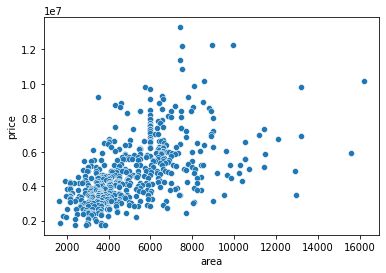

In [163]:
sns.scatterplot(x="area", y="price", data=df)

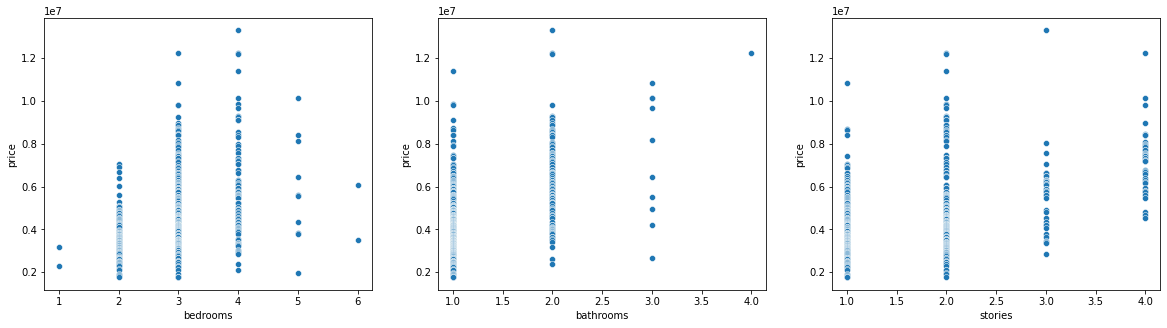

In [164]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 5) )
axes = axes.flatten()

for i, col in enumerate(ord_cols):
    sns.scatterplot(x=col, y='price', data=df, ax=axes[i])

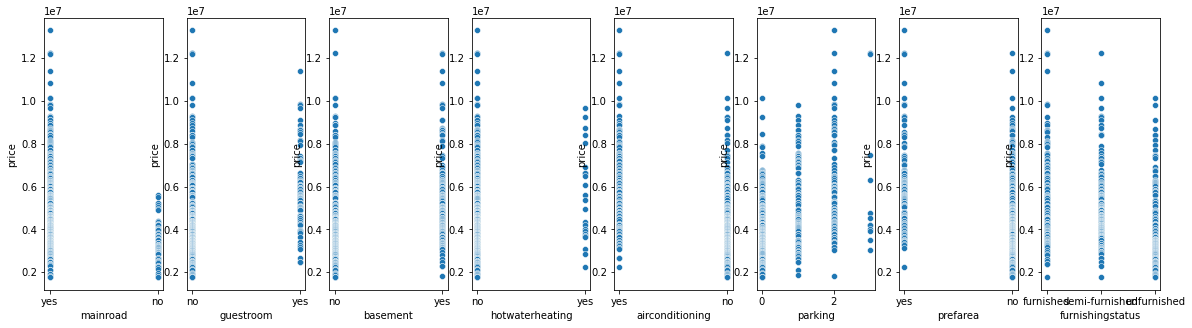

In [165]:
fig, axes = plt.subplots(ncols=8, nrows=1, figsize=(20, 5) )
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.scatterplot(x=col, y='price', data=df, ax=axes[i])

# feature engineering

- Convertir datos numericos en categoricos
- nuevas variables
- Ingenieria de caracteristicas

In [166]:
#Los cuantiles se usan para dividir numericos y poder categorizar
df["area"].quantile([0.20,0.4,0.6,0.8])

0.2    3450.0
0.4    4065.0
0.6    5400.0
0.8    6600.0
Name: area, dtype: float64

In [167]:
#Crear columna para volver categorica el area
df["area_cat"] = pd.cut(df["area"],
                               bins=[0., 3450, 4065, 5400, 6600, np.inf],
                               labels=[1, 2, 3, 4, 5])

df["area_cat"].value_counts()

1    112
3    112
5    108
4    107
2    106
Name: area_cat, dtype: int64

<AxesSubplot:xlabel='area_cat', ylabel='price'>

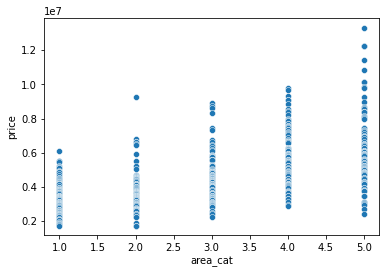

In [168]:
sns.scatterplot(x="area_cat", y="price", data=df)

In [169]:
corr_matrix =df.corr()
corr_matrix["price"].sort_values(ascending=False)

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

In [170]:
#Crear columna sumando 3 columnas para buscar mejor correlación
df["lux_home"] = df["bathrooms"] + df["bedrooms"] + df["parking"]
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price        1.000000
lux_home     0.588013
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

In [171]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_cat,lux_home
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,5,8
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,5,11
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,5,7
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,5,9
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1,5
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1,4
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,2,3
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,1,4


## ONE-HOT ENCODER

In [172]:
#Las columnas categoricas las vuelvo numericas
data_dummies = pd.get_dummies(df[cat_cols])
data_dummies.head()

,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,2,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,3,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,2,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0


In [173]:
data_ord  = df[ord_cols]

In [174]:
#Unir los datos dummies con los ordinales
list_df = [
    df[['price']],
    data_dummies,
    data_ord,
]

data_fe = pd.concat(list_df, axis=1)
data_fe.shape

(545, 20)

In [175]:
data_fe.head()

,price,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms,bathrooms,stories
0,13300000,2,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,4,2,3
1,12250000,3,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,4,4,4
2,12250000,2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,3,2,2
3,12215000,3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,4,2,2
4,11410000,2,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,4,1,2


In [176]:
corr_matrix = data_fe.corr()
corr_matrix["price"].sort_values(ascending=False)

price                              1.000000
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
furnishingstatus_furnished         0.229350
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
hotwaterheating_no                -0.093073
basement_no                       -0.187057
guestroom_no                      -0.255517
furnishingstatus_unfurnished      -0.280587
mainroad_no                       -0.296898
prefarea_no                       -0.329777
airconditioning_no                -0.452954
Name: price, dtype: float64

In [177]:
from sklearn.model_selection import train_test_split

cols = data_fe.columns
X = data_fe[[col for col in cols if col != 'price']]
y = df['price']/1.0e6

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [178]:
#Entrenar los 3 modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()


lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso()

In [179]:
#Realizar predicciones
y_pred_lr    = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

Text(0.5, 0, 'Predictions')

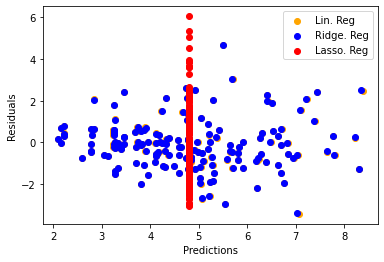

In [180]:
#Realizar un grafico de disperción para comparar los 3 modelos
plt.scatter(y_pred_lr ,    y_test-y_pred_lr,    color='orange', label='Lin. Reg')
plt.scatter(y_pred_ridge , y_test-y_pred_ridge, color='blue',   label='Ridge. Reg')
plt.scatter(y_pred_lasso , y_test-y_pred_lasso, color='red',    label='Lasso. Reg')

plt.legend()

plt.ylabel('Residuals')
plt.xlabel('Predictions')

Text(0, 0.5, 'Frequency')

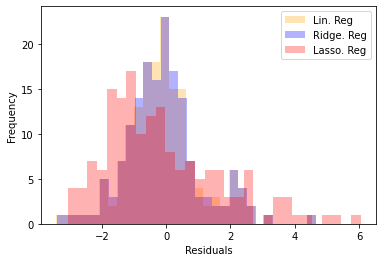

In [181]:
plt.hist(y_test-y_pred_lr,    bins=30, color='orange', label='Lin. Reg',   alpha=0.3)
plt.hist(y_test-y_pred_ridge, bins=30, color='blue',   label='Ridge. Reg', alpha=0.3)
plt.hist(y_test-y_pred_lasso, bins=30, color='red',    label='Lasso. Reg', alpha=0.3)

plt.legend()
plt.xlabel('Residuals')
plt.ylabel('Frequency')

In [182]:
#Revisar el error y el score
from sklearn.metrics import mean_squared_error, r2_score

print('Model', 'MSE', 'R2')
print('Lineal. Reg', mean_squared_error(y_test, y_pred_lr),    r2_score(y_test, y_pred_lr) )
print('Ridge.  Reg', mean_squared_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge) )
print('Lasso.  Reg', mean_squared_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso) )

Model MSE R2
Lineal. Reg 1.4097842112905754 0.5760264868890461
Ridge.  Reg 1.4082621167271163 0.576484236219893
Lasso.  Reg 3.3412400858083 -0.00483271551926201


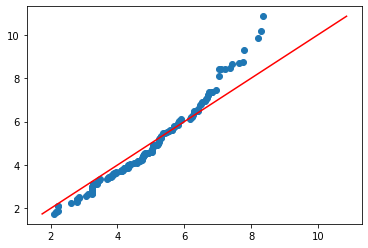

In [183]:
#Grafico para determinar el modelo en que parte le va mejor
# QQ plot

plt.scatter(np.sort(y_pred_ridge), np.sort(y_test))
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red')

In [221]:
data_fe["Luxus_2"] = data_fe["bathrooms"] + data_fe["stories"] + data_fe["airconditioning_yes"] + data_fe["parking"]
data_fe["Luxus_4"] = data_fe["bathrooms"] + data_fe["guestroom_yes"] + data_fe["airconditioning_yes"] + data_fe["parking"] + data_fe["stories"]

In [222]:
data_fe.head()

,price,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,...,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms,bathrooms,stories,Luxus_2,Luxus_3,Luxus_4
0,13300000,2,0,1,1,0,1,0,1,0,...,1,1,0,0,4,2,3,8,4,8
1,12250000,3,0,1,1,0,1,0,1,0,...,0,1,0,0,4,4,4,12,5,12
2,12250000,2,0,1,1,0,0,1,1,0,...,1,0,1,0,3,2,2,6,3,6
3,12215000,3,0,1,1,0,0,1,1,0,...,1,1,0,0,4,2,2,8,5,8
4,11410000,2,0,1,0,1,0,1,1,0,...,0,1,0,0,4,1,2,6,5,7


In [223]:
corr_matrix = data_fe.corr()
corr_matrix["price"].sort_values(ascending=False)

price                              1.000000
Luxus_4                            0.704823
Luxus_2                            0.682673
Luxus_3                            0.593836
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
furnishingstatus_furnished         0.229350
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
hotwaterheating_no                -0.093073
basement_no                       -0.187057
guestroom_no                      -0.255517
furnishingstatus_unfurnished      -0.280587
mainroad_no                       -0.296898
prefarea_no                       -0.329777
airconditioning_no              

In [224]:
data_fe.head()

,price,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,...,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms,bathrooms,stories,Luxus_2,Luxus_3,Luxus_4
0,13300000,2,0,1,1,0,1,0,1,0,...,1,1,0,0,4,2,3,8,4,8
1,12250000,3,0,1,1,0,1,0,1,0,...,0,1,0,0,4,4,4,12,5,12
2,12250000,2,0,1,1,0,0,1,1,0,...,1,0,1,0,3,2,2,6,3,6
3,12215000,3,0,1,1,0,0,1,1,0,...,1,1,0,0,4,2,2,8,5,8
4,11410000,2,0,1,0,1,0,1,1,0,...,0,1,0,0,4,1,2,6,5,7


In [225]:
from sklearn.model_selection import train_test_split

cols = data_fe.columns
X = data_fe[[col for col in cols if col != 'price']]
y = df['price']/1.0e6

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [226]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()


lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso()

In [227]:
y_pred_lr    = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

In [228]:
from sklearn.metrics import mean_squared_error, r2_score

print('Model', 'MSE', 'R2')
print('Lineal. Reg', mean_squared_error(y_test, y_pred_lr),    r2_score(y_test, y_pred_lr) )
print('Ridge.  Reg', mean_squared_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge) )
print('Lasso.  Reg', mean_squared_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso) )

Model MSE R2
Lineal. Reg 1.1301320040325329 0.6257513614720351
Ridge.  Reg 1.130871434833617 0.6255064954124918
Lasso.  Reg 1.646578772429777 0.45472753482596506


## Resultado de los modelos
Se crean dos columnas nuevas Luxus_2 y luxus_4 con las variables que se consideran mas importantes en el modelo, logrando 
pasar de este parametro:
- Lineal. Reg 1.4097842112905754,  0.5760264868890461
- Ridge.  Reg 1.4082621167271163,  0.576484236219893
- Lasso.  Reg 3.3412400858083,  -0.00483271551926201

a este:
- Lineal. Reg 1.1301320040325329,  0.6257513614720351
- Ridge.  Reg 1.130871434833617,  0.6255064954124918
- Lasso.  Reg 1.646578772429777,  0.45472753482596506

Mejorando notablemente el modelo de lasso y logrando un score mas elevado en lineal y Ridge.
Del mismo modo los errores disminuyen en los 3 modelos logrando una mejor precisión